In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline



In [ ]:
# Initializing the data
data = pd.read_csv("/content/data.csv")
data = data.astype(float)
data.shape

(28550, 29)

In [ ]:
data.head()

,id,TtlPrc,UntPrc,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
0,1.010876e+11,24660.0,82533.0,2010.0,1.0,4.0,1.0,1.0,3.0,40.006694,...,100.0,150.0,55.0,279.0,0.000000,13.0,7.0,33.0,20.0,24.0
1,1.010886e+11,12000.0,67659.0,1999.0,1.0,3.0,2.0,0.0,2.0,39.979226,...,100.0,208.0,52.0,397.0,23.570463,11.0,10.0,35.0,19.0,23.0
2,1.010898e+11,16500.0,67205.0,2007.0,1.0,4.0,2.0,1.0,2.0,39.973845,...,100.0,238.0,38.0,446.0,41.096296,16.0,10.0,33.0,21.0,18.0
3,1.010898e+11,4430.0,74996.0,1985.0,0.0,2.0,1.0,1.0,1.0,39.962995,...,100.0,187.0,41.0,357.0,36.396620,12.0,10.0,33.0,22.0,21.0
4,1.010909e+11,5500.0,32682.0,2003.0,1.0,3.0,2.0,1.0,2.0,39.943112,...,88.0,180.0,32.0,478.0,0.000000,11.0,11.0,32.0,24.0,19.0


In [ ]:
# preprocessing and check the data
data = data.drop('id', axis=1)
data = data.drop('TtlPrc', axis=1)
data = data.rename(columns={"UntPrc": "Price"})

use_property_only = 0
remove_a, remove_t, remove_e = 0,0,0
if use_property_only:
    data = data.drop(['TspNum','TspDst', 'AtrNum','AtrDst','EdcNum','EdcDst','HthNum',
                      'HthDst','RstNum','RstDst','RtlNum','RtlDst','TrfV',
                      'AgrPct','DstPct','HppPct','SadPct','FeaPct'], axis=1)
else:
    if remove_a:
        data = data.drop(['TspNum', 'TspDst', 'AtrNum', 'AtrDst', 'EdcNum', 'EdcDst', 'HthNum',
                          'HthDst', 'RstNum', 'RstDst', 'RtlNum', 'RtlDst'], axis=1)
    if remove_t:
        data = data.drop(['TrfV'], axis=1)
    if remove_e:
        data = data.drop(['AgrPct', 'DstPct', 'HppPct', 'SadPct', 'FeaPct'], axis=1)


In [ ]:
data.dtypes

,0
Price,float64
Year,float64
Elvt,float64
RmNum,float64
HllNum,float64
KchNum,float64
BthNum,float64
Lat,float64
Lng,float64
TspNum,float64


In [ ]:
data.isnull().sum()

,0
Price,0
Year,0
Elvt,0
RmNum,0
HllNum,0
KchNum,0
BthNum,0
Lat,0
Lng,0
TspNum,0


In [ ]:
# Viewing the data statistics
data.describe()

,Price,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,Lng,TspNum,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
count,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,...,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000
mean,66056.070193,2001.004658,0.605464,2.229877,1.160140,0.969457,1.312469,39.944652,116.396642,37.291349,...,85.461086,235.328441,32.952084,453.112329,8.093711,12.079194,7.681401,32.072609,22.882907,18.708511
std,25573.083814,9.024089,0.488759,0.870877,0.542232,0.197303,0.572143,0.140745,0.293355,12.727191,...,22.758513,124.117173,15.698275,116.829710,14.870412,4.297804,2.767371,8.703016,6.721690,7.031417
min,13209.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.015941,101.727603,0.000000,...,0.000000,8.000000,0.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45760.000000,1996.000000,0.000000,2.000000,1.000000,1.000000,1.000000,39.891946,116.331892,28.000000,...,75.000000,149.000000,19.000000,372.000000,0.000000,11.000000,7.000000,30.000000,21.000000,17.000000
50%,61924.500000,2003.000000,1.000000,2.000000,1.000000,1.000000,1.000000,39.933622,116.395645,39.000000,...,100.000000,210.000000,33.000000,445.000000,0.000000,12.000000,8.000000,33.000000,24.000000,19.000000
75%,81598.000000,2007.000000,1.000000,3.000000,1.000000,1.000000,2.000000,40.002834,116.469392,50.000000,...,100.000000,292.000000,46.000000,527.000000,0.000000,14.000000,9.000000,36.000000,26.000000,21.000000
max,159975.000000,2017.000000,1.000000,9.000000,5.000000,3.000000,8.000000,40.971406,117.948355,55.000000,...,100.000000,1000.000000,79.000000,1000.000000,69.094722,75.000000,46.000000,100.000000,66.000000,100.000000


In [ ]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(27, 27)

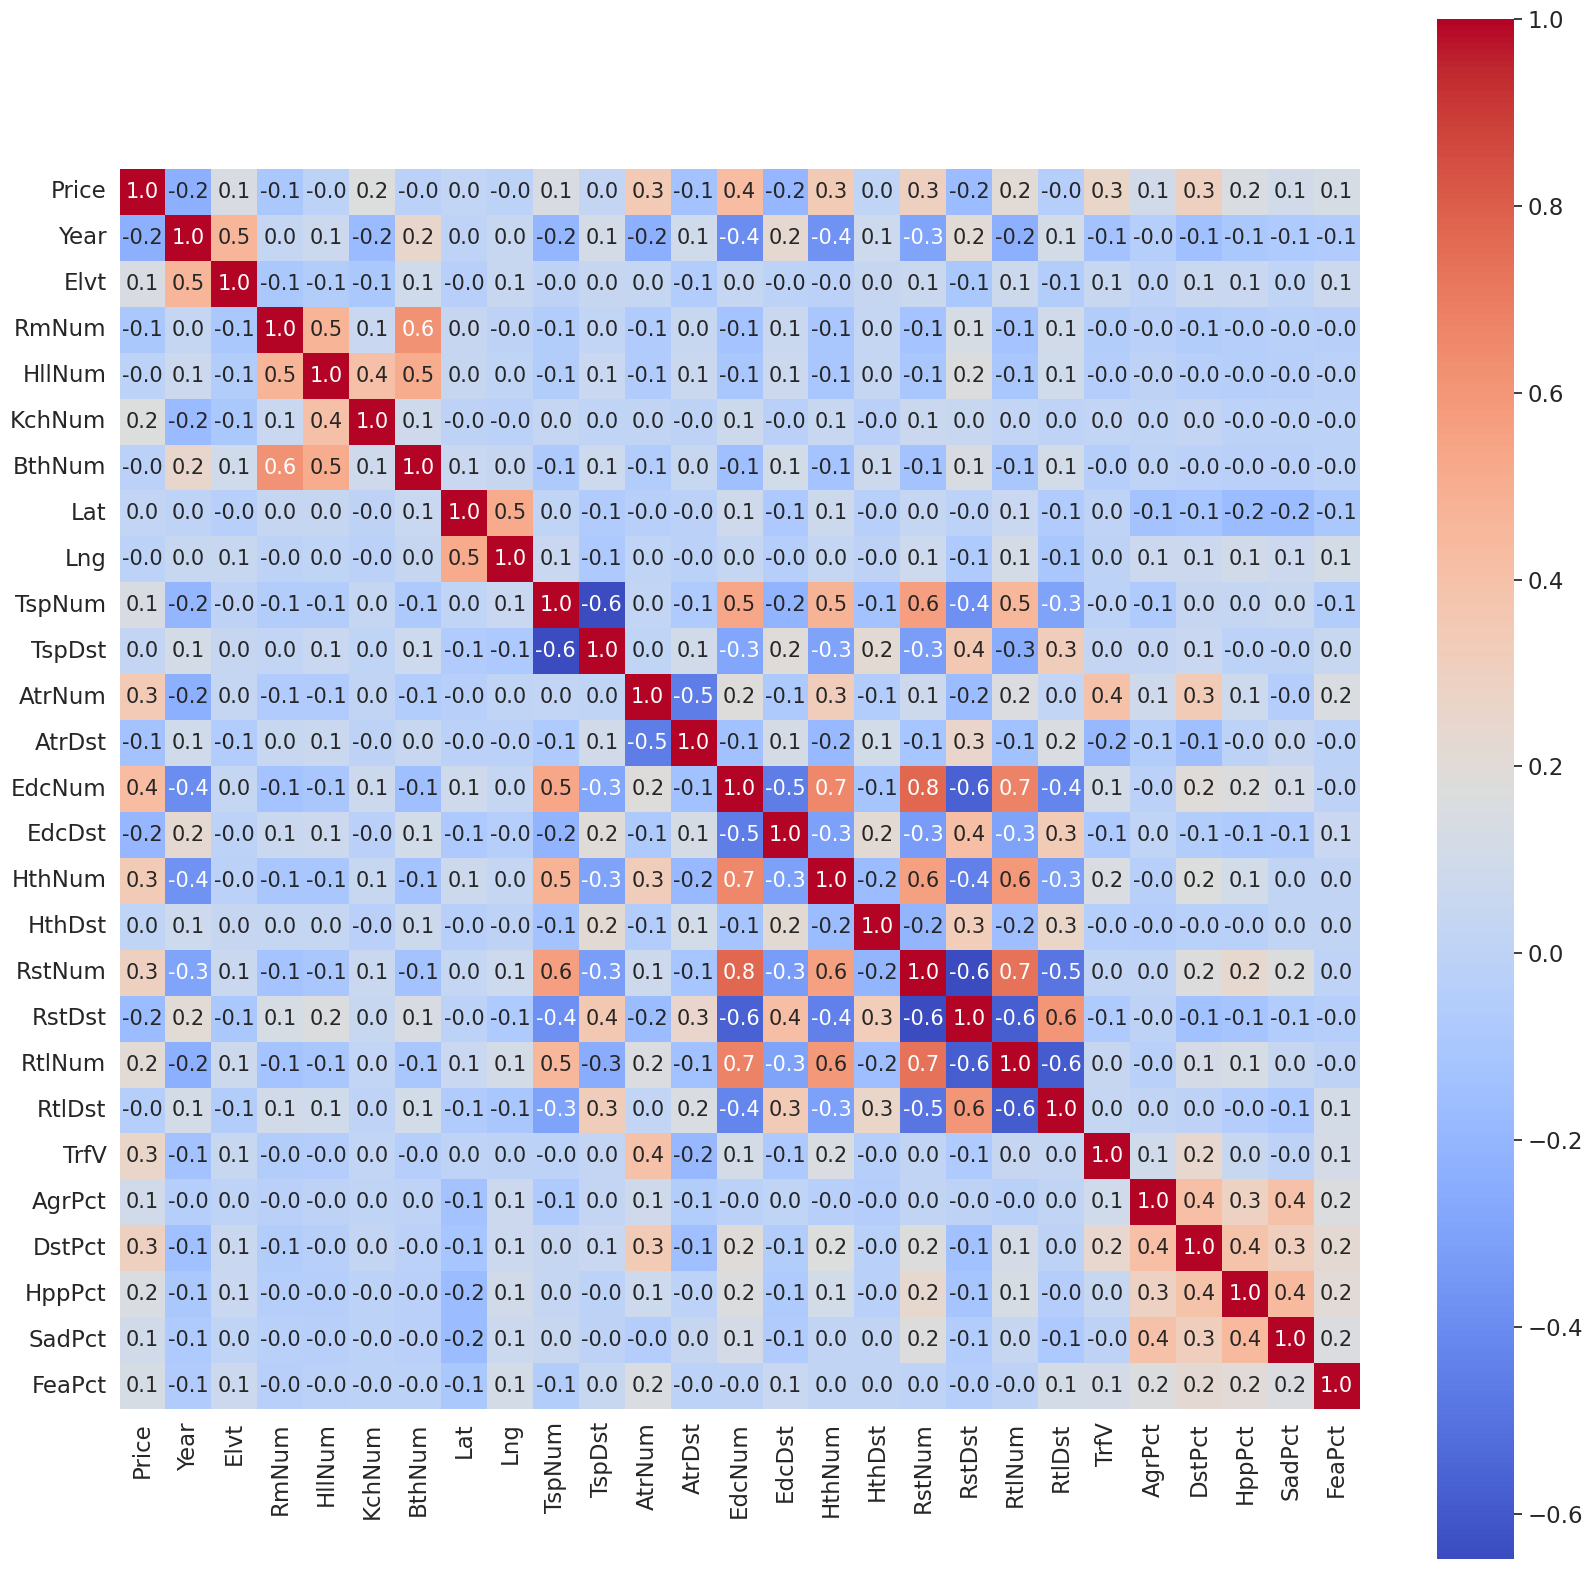

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
# sns.heatmap(data, annot=True, cmap='coolwarm')

# Save the heatmap as an image file (e.g., PNG format)
plt.savefig('heatmap.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Spliting target variable and independent variables
X = data.drop(['Price'], axis = 1)
y = data['Price']

# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)


In [ ]:
print('------------Linear Regression-----------------')
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

# Value of y intercept
print(lm.intercept_)


------------Linear Regression-----------------
548013.5557669958


In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
print(coeffcients)

   Attribute  Coefficients
0       Year    -225.75364
1       Elvt   8321.198579
2      RmNum   -2341.10337
3     HllNum  -1195.103358
4     KchNum  16563.598136
5     BthNum   4251.968082
6        Lat  10408.041533
7        Lng  -4548.266303
8     TspNum     28.062999
9     TspDst     25.225605
10    AtrNum    307.328478
11    AtrDst      3.917261
12    EdcNum    316.915286
13    EdcDst    -10.458641
14    HthNum    150.618326
15    HthDst      6.581001
16    RstNum     109.19536
17    RstDst     15.602656
18    RtlNum   -236.628797
19    RtlDst      4.772687
20      TrfV    157.894182
21    AgrPct    194.200055
22    DstPct    860.432803
23    HppPct      33.10326
24    SadPct     35.233391
25    FeaPct     212.39968


In [ ]:

# Model prediction on train data
y_pred = lm.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.379706265687781
Adjusted R^2: 0.37889818686765286
MAE: 15390.863827220819
MSE: 411032380.93354887
RMSE: 20273.933533815012


In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mae_linreg)
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_linreg)


R^2: 0.3651057966586845
Adjusted R^2: 0.3631724107033232
MAE: 15235.030397488415
MSE: 402302483.77281123
RMSE: 20057.47949700588


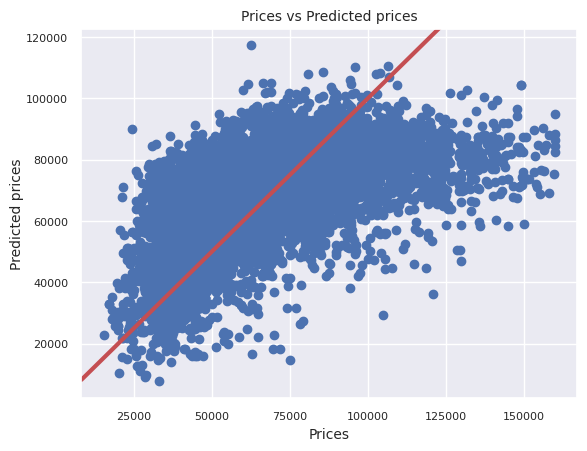

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.clf()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices", fontsize=10)
plt.ylabel("Predicted prices", labelpad=1.5, fontsize=10)
plt.title("Prices vs Predicted prices", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)

plt.savefig("scatter_plot 1.png", format="png", dpi=300)  # dpi=300 for high resolution

plt.show()

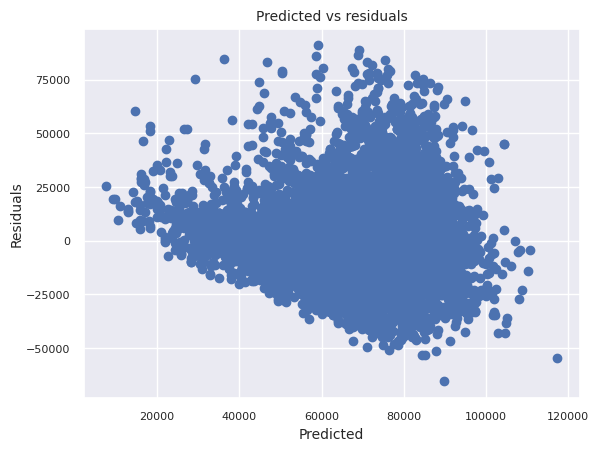

In [ ]:

# Checking residuals
plt.clf()
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals", fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Residuals", labelpad=1.5, fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("scatter_plot 2.png", format="png", dpi=300)  # dpi=300 for high resolution
plt.show()

<ipython-input-142-761c5246f643>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_test_pred)


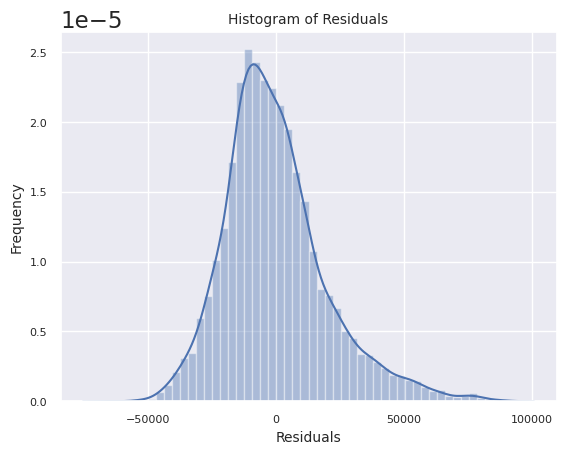

In [ ]:
# Checking Normality of errors
plt.clf()
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals", fontsize=10)
plt.xlabel("Residuals", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("histtogram_plot 1.png", format="png", dpi=300)  # dpi=300 for high resolution
plt.show()

In [ ]:
print('------------XGBoost Regressor-----------------')
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

------------XGBoost Regressor-----------------
R^2: 0.9357106418656186
Adjusted R^2: 0.9356268898207497
MAE: 4337.623297306965
MSE: 42600797.784882374
RMSE: 6526.928663995216


In [ ]:

#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mae_xgb)
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_xgb)


R^2: 0.8808985318327179
Adjusted R^2: 0.8805358428924099
MAE: 5658.15117860205
MSE: 75468977.68560545
RMSE: 8687.288281483783


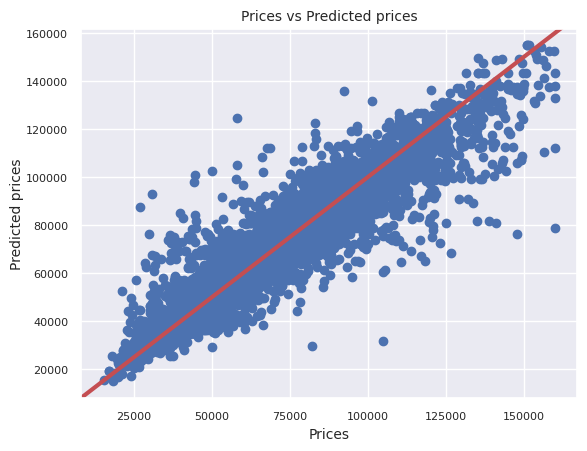

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.clf()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices", fontsize=10)
plt.ylabel("Predicted prices", labelpad=1.5, fontsize=10)
plt.title("Prices vs Predicted prices", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)
plt.savefig("scatter_plot 3.png", format="png", dpi=300)  # dpi=300 for high resolution

plt.show()

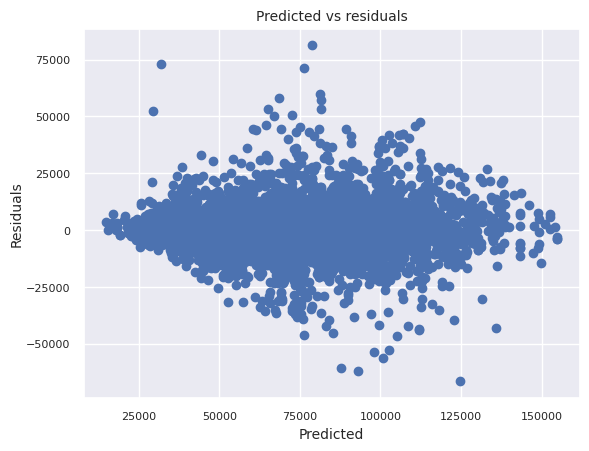

In [ ]:
# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals", fontsize=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Residuals", labelpad=1.5, fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("scatter_plot 4.png", format="png", dpi=300)  # dpi=300 for high resolution
plt.show()

<ipython-input-147-936a45c515d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_test_pred)


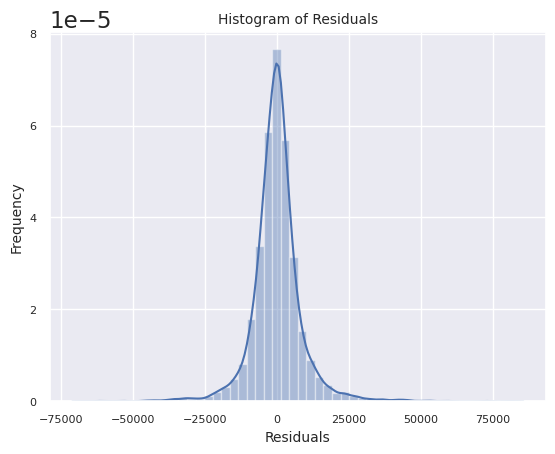

In [ ]:
# Checking Normality of errors
plt.clf()
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals", fontsize=10)
plt.xlabel("Residuals", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("histogram_plot 2.png", format="png", dpi=300)  # dpi=300 for high resolution
plt.show()

<Figure size 640x480 with 0 Axes>

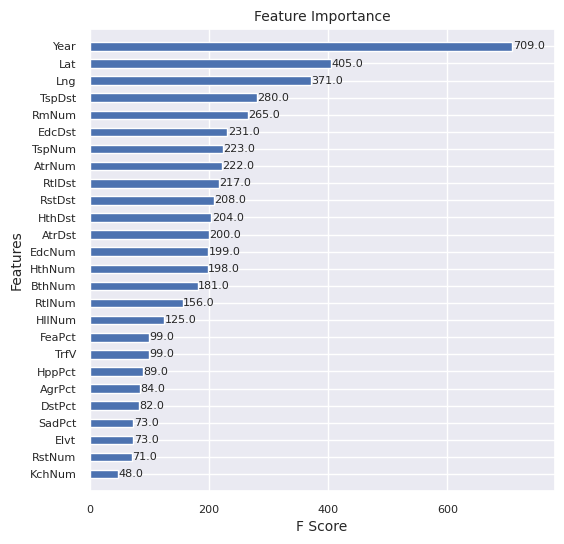

In [ ]:
from xgboost import plot_importance
plt.clf()
fig,ax = plt.subplots(figsize=(6,6))
plot_importance(reg,height=0.5,max_num_features=64,ax=ax)
plt.title("Feature Importance", fontsize=10)
plt.xlabel("F Score", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
for text in ax.texts:
    text.set_fontsize(8)
plt.show()